In [2]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.13.0


In [38]:
import matplotlib.pyplot as plt
print("Matplotlib imported successfully!")


Matplotlib imported successfully!


In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [40]:
X_train = np.loadtxt('Documents/Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('Documents/Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('Documents/Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('Documents/Dataset/labels_test.csv', delimiter = ',')

In [41]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [44]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [45]:
X_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

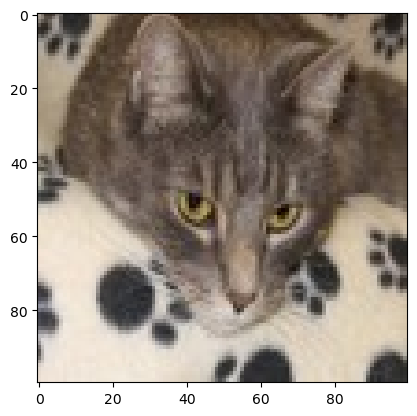

In [51]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [64]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [66]:
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [68]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 6s 200ms/step - loss: 0.3980 - accuracy: 0.8220
Epoch 2/5
32/32 [==============================] - 7s 215ms/step - loss: 0.3335 - accuracy: 0.8555
Epoch 3/5
32/32 [==============================] - 7s 230ms/step - loss: 0.2814 - accuracy: 0.8795
Epoch 4/5
32/32 [==============================] - 9s 284ms/step - loss: 0.2412 - accuracy: 0.9065
Epoch 5/5
32/32 [==============================] - 7s 225ms/step - loss: 0.1750 - accuracy: 0.9375


In [74]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 21ms/step - loss: 0.7238 - accuracy: 0.6975


[0.7237842082977295, 0.6974999904632568]

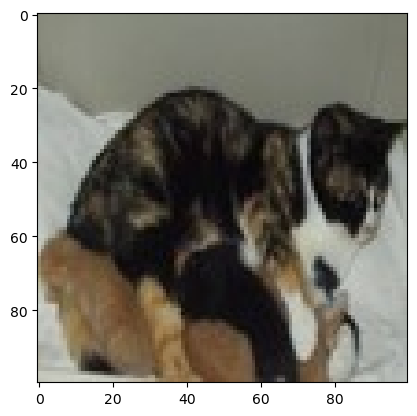

1/1 [==============================] - 0s 22ms/step
Our model predicts it to be a cat


In [89]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print("Our model predicts it to be a", pred)